# Modelos de Aprendizado de Máquina
Neste notebook tem os seguintes modelos de aprendizado de máquina comparados:
- Floresta Aleatória
- SVM

## Importações

In [83]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import mean_squared_error

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

## Preparação do Diretório Principal

In [84]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}' 

In [85]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projects/tcc'

## Formatação das células

In [86]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Guarantees visualization inside the jupyter
%matplotlib inline

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# pretty print
pp = pprint.PrettyPrinter(indent=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

## Carregamento dos Dados

In [88]:
%%time

df_vale3 = pd.read_csv('data/cleansing/df_vale3_cleansing.csv',
                        encoding='utf8',
                        delimiter=',',
                        parse_dates=True,
                        index_col=0,
                        verbose=True)

Tokenization took: 1.70 ms
Type conversion took: 2.34 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 13 ms, sys: 23 µs, total: 13 ms
Wall time: 15 ms


In [89]:
print(df_vale3.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2445 entries, 2010-07-12 to 2020-05-28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   preco         2445 non-null   float64
 1   residuos      2445 non-null   float64
 2   tendencia     2445 non-null   float64
 3   sazonalidade  2445 non-null   float64
 4   diff_1        2445 non-null   float64
 5   diff_2        2445 non-null   float64
 6   diff_3        2445 non-null   float64
 7   diff_4        2445 non-null   float64
 8   diff_5        2445 non-null   float64
dtypes: float64(9)
memory usage: 191.0 KB
None


In [90]:
df_vale3.head()

,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2010-07-12,40.000000,1.002310,41.827333,1.000149,-0.600000,-0.460000,0.490000,0.980000,0.420000
2010-07-13,40.070000,1.036654,41.910833,0.998563,0.070000,-0.530000,-0.390000,0.560000,1.050000
2010-07-14,40.080000,1.028377,41.977833,1.000439,0.010000,0.080000,-0.520000,-0.380000,0.570000
2010-07-15,39.760000,1.044658,42.045833,1.000935,-0.320000,-0.310000,-0.240000,-0.840000,-0.700000
2010-07-16,38.880000,1.028132,42.123500,1.001784,-0.880000,-1.200000,-1.190000,-1.120000,-1.720000


---

## Divisão dos Dados

In [91]:
size_train = 2415
size_test = 30
print(size_train)
print(size_test)

df_train = df_vale3.iloc[:size_train]
df_test = df_vale3.iloc[size_train:]
print(df_train.columns)
print(df_test.columns)

2415
30
Index(['preco', 'residuos', 'tendencia', 'sazonalidade', 'diff_1', 'diff_2',
       'diff_3', 'diff_4', 'diff_5'],
      dtype='object')
Index(['preco', 'residuos', 'tendencia', 'sazonalidade', 'diff_1', 'diff_2',
       'diff_3', 'diff_4', 'diff_5'],
      dtype='object')


In [92]:
df_vale3_without_target = df_train.columns
df_vale3_without_target = df_vale3_without_target.drop('preco')

print(df_vale3_without_target)

Index(['residuos', 'tendencia', 'sazonalidade', 'diff_1', 'diff_2', 'diff_3',
       'diff_4', 'diff_5'],
      dtype='object')


Text(0.5, 1.0, 'Train size: 2415')

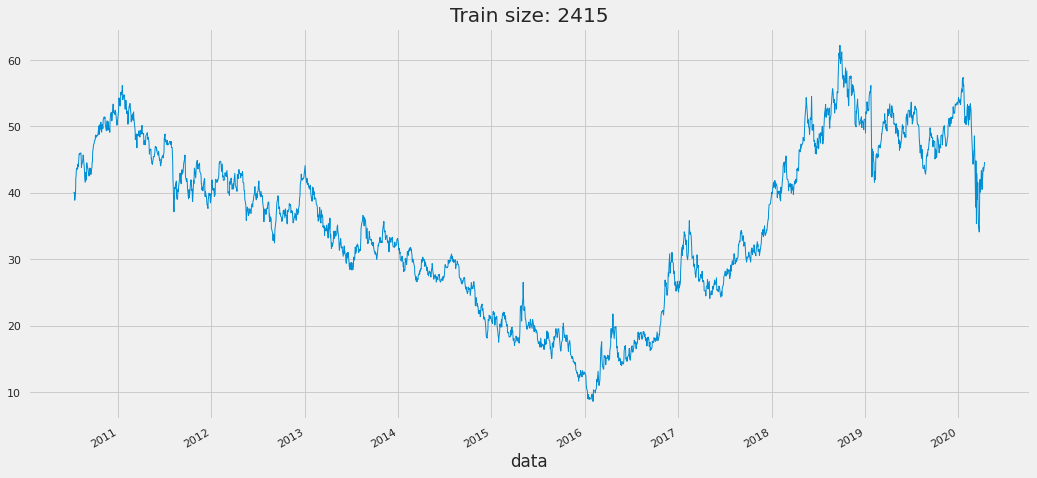

In [93]:
df_train['preco'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Train size: {len(df_train)}')

Text(0.5, 1.0, 'Test size: 30')

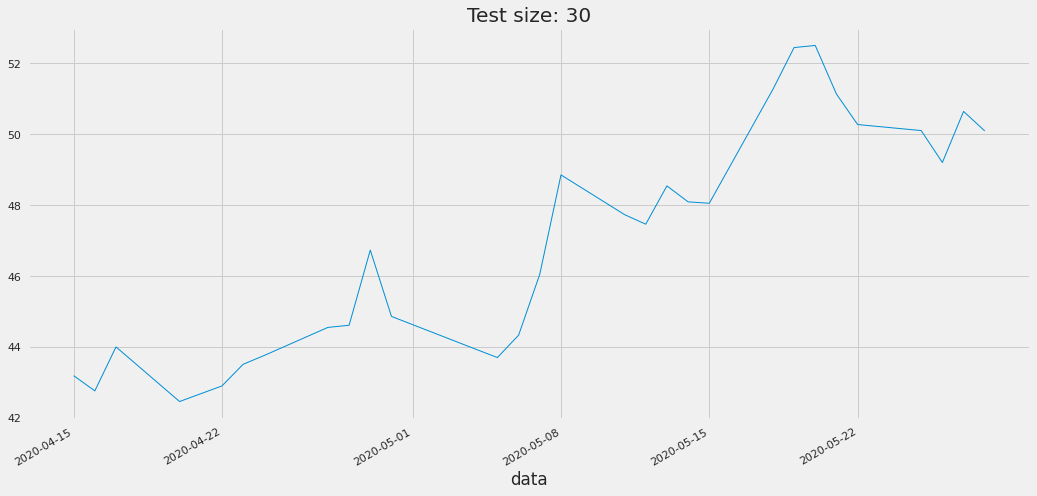

In [94]:
df_test['preco'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Test size: {len(df_test)}')

In [95]:
df_train.index

DatetimeIndex(['2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15',
               '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23',
               ...
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-13', '2020-04-14'],
              dtype='datetime64[ns]', name='data', length=2415, freq=None)

In [96]:
df_test.index

DatetimeIndex(['2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27',
               '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', name='data', freq=None)

In [97]:
X_train = df_train[df_vale3_without_target]
y_train = df_train['preco']
print(len(X_train))
print(len(y_train))
print(type(X_train))
print(type(y_train))
print((X_train[:5]))
print(y_train[:5])

2415
2415
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residuos  tendencia  sazonalidade    diff_1    diff_2    diff_3  \
data                                                                          
2010-07-12  1.002310  41.827333      1.000149 -0.600000 -0.460000  0.490000   
2010-07-13  1.036654  41.910833      0.998563  0.070000 -0.530000 -0.390000   
2010-07-14  1.028377  41.977833      1.000439  0.010000  0.080000 -0.520000   
2010-07-15  1.044658  42.045833      1.000935 -0.320000 -0.310000 -0.240000   
2010-07-16  1.028132  42.123500      1.001784 -0.880000 -1.200000 -1.190000   

              diff_4    diff_5  
data                            
2010-07-12  0.980000  0.420000  
2010-07-13  0.560000  1.050000  
2010-07-14 -0.380000  0.570000  
2010-07-15 -0.840000 -0.700000  
2010-07-16 -1.120000 -1.720000  
data
2010-07-12   40.000000
2010-07-13   40.070000
2010-07-14   40.080000
2010-07-15   39.760000
2010-07-16   38.880000
Name: preco

In [98]:
X_test = df_test[df_vale3_without_target]
y_test = df_test['preco']
print(len(X_test))
print(len(y_test))
print(type(X_test))
print(type(y_test))
print(X_test[:5])
print(y_test[:5])

30
30
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residuos  tendencia  sazonalidade    diff_1    diff_2    diff_3  \
data                                                                          
2020-04-15  0.905870  43.399167      0.999907 -1.340000 -1.380000 -0.090000   
2020-04-16  0.988242  43.700667      1.000522 -0.430000 -1.770000 -1.810000   
2020-04-17  1.017706  43.906333      1.002512  1.240000  0.810000 -0.530000   
2020-04-20  0.973152  44.138000      1.003050 -1.540000 -0.300000 -0.730000   
2020-04-22  1.011625  44.384000      1.000677  0.440000 -1.100000  0.140000   

              diff_4    diff_5  
data                            
2020-04-15 -0.320000 -0.590000  
2020-04-16 -0.520000 -0.750000  
2020-04-17 -0.570000  0.720000  
2020-04-20 -2.070000 -2.110000  
2020-04-22 -0.290000 -1.630000  
data
2020-04-15   43.190000
2020-04-16   42.760000
2020-04-17   44.000000
2020-04-20   42.460000
2020-04-22   42.900000
Name: preco, dt

---

## Métrica de Avaliação

In [99]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

---

## Dicionário de Resultados

In [100]:
dict_results = {}

---

## Impressão dos Resutados

In [101]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['previsao'])
    mape = mean_absolute_percentage_error(df_test, y_forecast)
    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]
    
    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Tempo (dias)", fontsize=20)
    plt.ylabel("Preço (R$)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

---

## Tree models

#### Random forest

In [102]:
# RandomForest params dict
rf_params_one = {}

rf_params_one['n_estimators'] = 1000
rf_params_one['max_depth'] = 10
rf_params_one['min_samples_split'] = 10
rf_params_one['min_samples_leaf'] = 10 # end tree necessary 30 leaf
rf_params_one['n_jobs'] = -1 # run all process

In [103]:
model_rf_regressor = RandomForestRegressor(**rf_params_one)
model_rf_regressor

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=1000, n_jobs=-1)

In [104]:
model_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=1000, n_jobs=-1)

In [105]:
y_pred_rf_regressor = model_rf_regressor.predict(X_test)
y_pred_rf_regressor[:5]

array([43.23761501, 43.3965443 , 44.15329461, 44.16724017, 44.89418683])

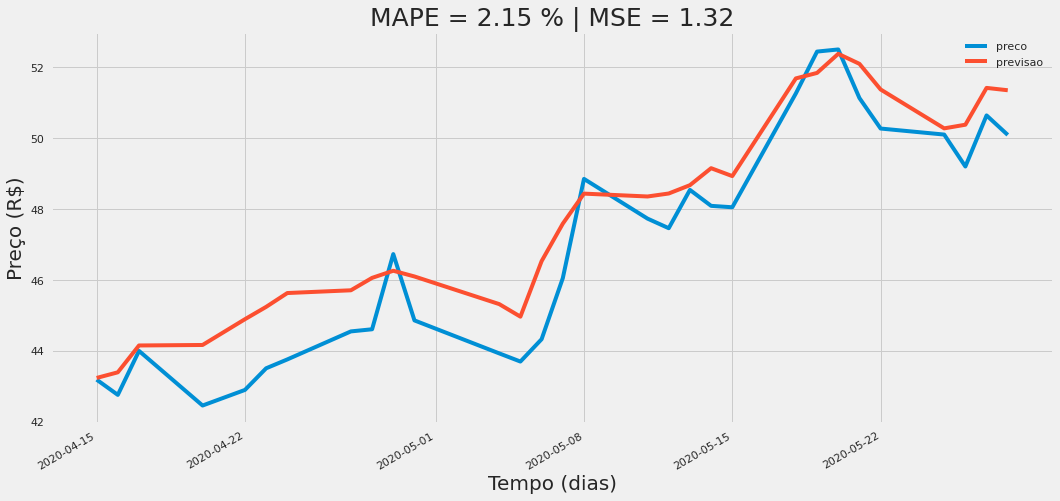

In [106]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_rf_regressor,
                  model_name='model_rf_regressor')

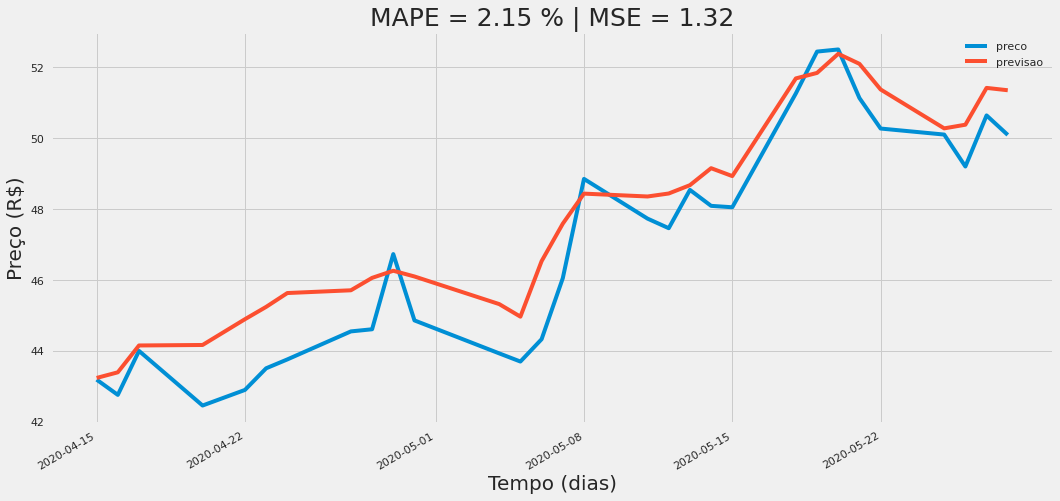

In [107]:
show_result_model(df_train=y_test,
                  df_test=y_test, 
                  y_forecast=y_pred_rf_regressor,
                  model_name='model_rf_regressor')

---

### SVM

In [108]:
model_svm_regressor = SVR(kernel='rbf')
model_svm_regressor

SVR()

In [109]:
model_svm_regressor.fit(X_train, y_train)

SVR()

In [110]:
y_pred_svm_regressor = model_svm_regressor.predict(X_test)
y_pred_svm_regressor[:5]

array([43.46996264, 43.59320603, 44.45403853, 43.62587314, 44.30126664])

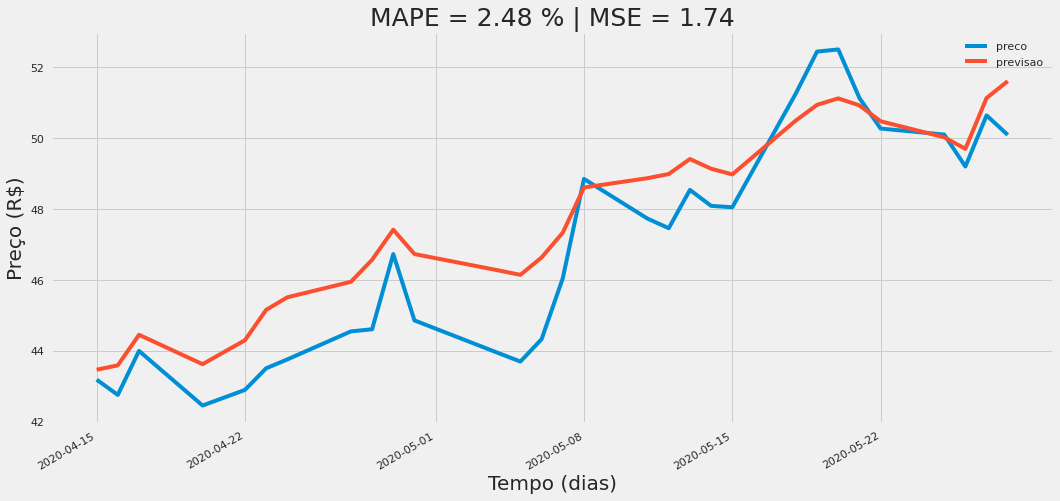

In [111]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_svm_regressor,
                  model_name='model_svm_regressor')

#### Zoom

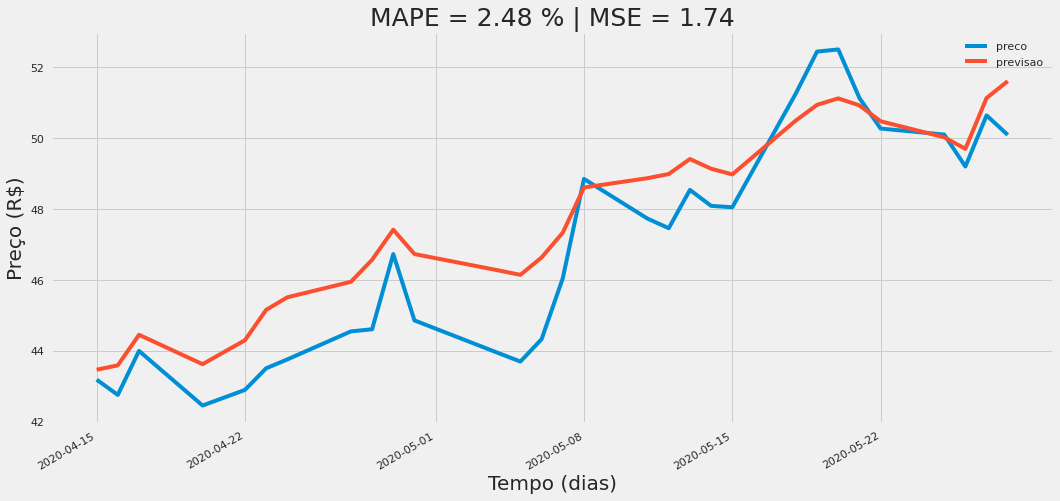

In [112]:
show_result_model(df_train=y_test,
                  df_test=y_test, 
                  y_forecast=y_pred_svm_regressor,
                  model_name='model_svm_regressor')

---

## Results

In [113]:
dict_results

{'model_rf_regressor': [2.14868583485455, 1.3168732444593203],
 'model_svm_regressor': [2.48195049454607, 1.742230904904737]}

---